In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN","NAME"], inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [32]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [33]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

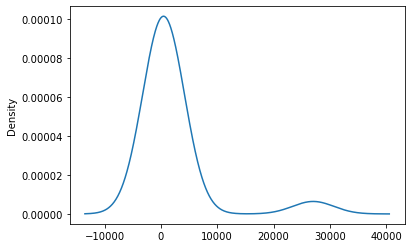

In [34]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [35]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [36]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

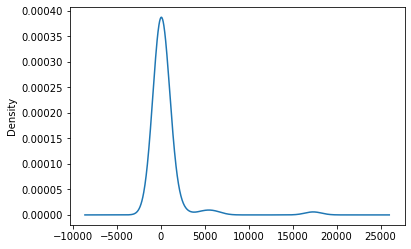

In [37]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [38]:
# Determine which values to replace if counts are less than ..?
replace_class = classification_counts[classification_counts < 800].index.tolist()

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [39]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [40]:

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Reila\Anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Reila\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [43]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# First Attempt

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes1 = 80
hidden_nodes2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and file names
os.makedirs("checkpoints_optimizer1/", exist_ok=True)
checkpoint_path = "checkpoints_optimizer1/weights.{epoch:02d}.hdf5"

In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=5)

In [51]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
  1/804 [..............................] - ETA: 7:02 - loss: 2272.5166 - accuracy: 0.4375
Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5
 20/804 [..............................] - ETA: 2s - loss: 2097.8579 - accuracy: 0.4953  
Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 2568.7761 - accuracy: 0.5042
Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1:

480/804 [================>.............] - ETA: 0s - loss: 100003.0547 - accuracy: 0.5130
Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5
500/804 [=================>............] - ETA: 0s - loss: 96029.8438 - accuracy: 0.5131 
Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 92161.1094 - accuracy: 0.5128
Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving model to checkpoints_optimizer1\weights.01.hdf5

Epoch 1: saving mo


Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 31031.4688 - accuracy: 0.4879
Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 27708.1445 - accuracy: 0.4874
Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimi

641/804 [======================>.......] - ETA: 0s - loss: 77359.2422 - accuracy: 0.4883
Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 75316.9141 - accuracy: 0.4885
Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 72902.5312 - accuracy: 0.4879
Epoch 2: saving model to checkpoints_optimizer1\weights.02.hdf5

Epoch 2: saving mode


Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 31587.2109 - accuracy: 0.4933
Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 34144.1445 - accuracy: 0.4915
Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5
357/804 [============>.................] - ETA: 1s - loss: 33068.9102 - accuracy: 0.4909
Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5

Epoch 3: saving mode


Epoch 3: saving model to checkpoints_optimizer1\weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 53688.7344 - accuracy: 0.4890
Epoch 4/50
  1/804 [..............................] - ETA: 1s - loss: 2218.8643 - accuracy: 0.5000
Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5
 23/804 [..............................] - ETA: 1s - loss: 587.6716 - accuracy: 0.5326 
Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5
 48/804


Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5
493/804 [=================>............] - ETA: 0s - loss: 6041.4106 - accuracy: 0.4966
Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 5761.5889 - accuracy: 0.5011
Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimizer1\weights.04.hdf5

Epoch 4: saving model to checkpoints_optimize


Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 121037.8281 - accuracy: 0.5239
Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 106801.9219 - accuracy: 0.5177
Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5
224/804 [=======>......................] -

654/804 [=======================>......] - ETA: 0s - loss: 42720.9805 - accuracy: 0.5058
Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 41218.6445 - accuracy: 0.5056
Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 39841.9805 - accuracy: 0.5040
Epoch 5: saving model to checkpoints_optimizer1\weights.05.hdf5

Epoch 5: saving mode


Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 41562.6719 - accuracy: 0.4794
Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5
370/804 [============>.................] - ETA: 1s - loss: 38824.8281 - accuracy: 0.4802
Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimizer1\weights.06.hdf5

Epoch 6: saving model to checkpoints_optimi


Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5
 26/804 [..............................] - ETA: 1s - loss: 29.5185 - accuracy: 0.5288
Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 1872.3966 - accuracy: 0.5288
Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1

496/804 [=================>............] - ETA: 0s - loss: 10249.8555 - accuracy: 0.5045
Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 9763.9258 - accuracy: 0.5074 
Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 9319.2021 - accuracy: 0.5083
Epoch 7: saving model to checkpoints_optimizer1\weights.07.hdf5

Epoch 7: saving model

169/804 [=====>........................] - ETA: 1s - loss: 10551.9912 - accuracy: 0.5155
Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 9288.9893 - accuracy: 0.5192 
Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 8413.1973 - accuracy: 0.5205
Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model


Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 10645.4746 - accuracy: 0.4868
Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 10385.3779 - accuracy: 0.4865
Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5

Epoch 8: saving model to checkpoints_optimizer1\weights.08.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 10791.5762 - accuracy: 0.4874
Epoch 8: saving mode


Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5
348/804 [===========>..................] - ETA: 0s - loss: 12681.6895 - accuracy: 0.5155
Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5
373/804 [============>.................] - ETA: 0s - loss: 17876.0762 - accuracy: 0.5140
Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5

Epoch 9: saving model to checkpoints_optimizer1\weights.09.hdf5
398/804 [=============>................] - ETA: 0s - loss: 17460.3516 - accuracy: 0.5169
Epoch 9: saving mode

 24/804 [..............................] - ETA: 1s - loss: 21292.6230 - accuracy: 0.5312
Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 19601.5000 - accuracy: 0.5108
Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5
 74/804 [=>............................] - ETA: 1s - loss: 14013.0059 - accuracy: 0.4878
Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10:


Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 6505.2017 - accuracy: 0.4983
Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 10749.8906 - accuracy: 0.4997
Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5

Epoch 10: saving model to checkpoints_optimizer1\weights.10.hdf5
574/804 [====================>...


Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 2146.4067 - accuracy: 0.5153
Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 1971.4097 - accuracy: 0.5164
Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 1945.2360 - accuracy: 0.5180
Epoch 11: sa

681/804 [========================>.....] - ETA: 0s - loss: 4409.7642 - accuracy: 0.5155
Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 4256.3564 - accuracy: 0.5161
Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 4120.0107 - accuracy: 0.5164
Epoch 11: saving model to checkpoints_optimizer1\weights.11.hdf5

Epoch 11: sa


Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5
370/804 [============>.................] - ETA: 0s - loss: 2356.3979 - accuracy: 0.5167
Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5
391/804 [=============>................] - ETA: 0s - loss: 2241.5479 - accuracy: 0.5175
Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5

Epoch 12: saving model to checkpoints_optimizer1\weights.12.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 2114.6448 - accuracy: 0.5197
Epoch 12: sa


Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 1479.4991 - accuracy: 0.4834
Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5
 72/804 [=>............................] - ETA: 1s - loss: 983.0281 - accuracy: 0.5039 
Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 879.0429 - accuracy: 0.5064
Epoch 13: sav


Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 8228.6953 - accuracy: 0.5115
Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 7954.6489 - accuracy: 0.5130
Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5

Epoch 13: saving model to checkpoints_optimizer1\weights.13.hdf5
592/804 [=====================>...


Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 1353.6816 - accuracy: 0.5460
Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 1267.9404 - accuracy: 0.5444
Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5
273/804 [=========>...............


Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 4228.4521 - accuracy: 0.5152
Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 4407.8291 - accuracy: 0.5164
Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpoints_optimizer1\weights.14.hdf5

Epoch 14: saving model to checkpo


Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5
394/804 [=============>................] - ETA: 0s - loss: 3964.7690 - accuracy: 0.5466
Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 3732.2390 - accuracy: 0.5459
Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5

Epoch 15: saving model to checkpoints_optimizer1\weights.15.hdf5
444/804 [===============>.........

 65/804 [=>............................] - ETA: 1s - loss: 209.3094 - accuracy: 0.5769
Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 239.0778 - accuracy: 0.5858
Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 257.4093 - accuracy: 0.5804
Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: savin


Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 1468.6365 - accuracy: 0.5414
Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 1425.9813 - accuracy: 0.5409
Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 1453.8127 - accuracy: 0.5414
Epoch 16: saving model to checkpoints_optimizer1\weights.16.hdf5

Epoch 16: sa

226/804 [=======>......................] - ETA: 1s - loss: 914.7778 - accuracy: 0.4949 
Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 916.8564 - accuracy: 0.4985
Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 1171.6844 - accuracy: 0.5007
Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: sav


Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 6275.5386 - accuracy: 0.5064
Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 6265.6084 - accuracy: 0.5053
Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5

Epoch 17: saving model to checkpoints_optimizer1\weights.17.hdf5
776/804 [=========================

392/804 [=============>................] - ETA: 0s - loss: 1570.9479 - accuracy: 0.5400
Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 10103.7666 - accuracy: 0.5393
Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 9536.7715 - accuracy: 0.5402 
Epoch 18: saving model to checkpoints_optimizer1\weights.18.hdf5

Epoch 18: 

 73/804 [=>............................] - ETA: 1s - loss: 1320.6605 - accuracy: 0.4765
Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 1045.2743 - accuracy: 0.4796
Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 870.9658 - accuracy: 0.5040 
Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: sa

568/804 [====================>.........] - ETA: 0s - loss: 459.4669 - accuracy: 0.5464
Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 441.4222 - accuracy: 0.5505
Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 425.2845 - accuracy: 0.5481
Epoch 19: saving model to checkpoints_optimizer1\weights.19.hdf5

Epoch 19: savin

239/804 [=======>......................] - ETA: 1s - loss: 1083.1266 - accuracy: 0.5455
Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 1004.3323 - accuracy: 0.5471
Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 925.7455 - accuracy: 0.5454 
Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: sa


Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 1271.2384 - accuracy: 0.5301
Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 1420.3823 - accuracy: 0.5280
Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5

Epoch 20: saving model to checkpoints_optimizer1\weights.20.hdf5
789/804 [=========================


Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5
415/804 [==============>...............] - ETA: 0s - loss: 1007.5777 - accuracy: 0.5169
Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 952.4545 - accuracy: 0.5192 
Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5

Epoch 21: saving model to checkpoints_optimizer1\weights.21.hdf5
465/804 [================>.............] - ETA: 0s - loss: 906.3378 - accuracy: 0.5212
Epoch 21: sav


Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 3469.7915 - accuracy: 0.5248
Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5
126/804 [===>..........................] - ETA: 1s - loss: 3262.1465 - accuracy: 0.5144
Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpo

571/804 [====================>.........] - ETA: 0s - loss: 1662.4716 - accuracy: 0.5113
Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 1641.5111 - accuracy: 0.5130
Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 1767.4597 - accuracy: 0.5142
Epoch 22: saving model to checkpoints_optimizer1\weights.22.hdf5

Epoch 22: sa

247/804 [========>.....................] - ETA: 1s - loss: 6.4889 - accuracy: 0.5338
Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 5.9590 - accuracy: 0.5353
Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 5.5180 - accuracy: 0.5345
Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving mode

742/804 [==========================>...] - ETA: 0s - loss: 12.3450 - accuracy: 0.5306
Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 11.9653 - accuracy: 0.5300
Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5
785/804 [============================>.] - ETA: 0s - loss: 11.7066 - accuracy: 0.5308
Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5

Epoch 23: saving model to checkpoints_optimizer1\weights.23.hdf5
797/804 [==========

416/804 [==============>...............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5301
Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5
438/804 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5315
Epoch 24: saving model to checkpoints_optimizer1\weights.24.hdf5

Epoch 24: saving mode

 99/804 [==>...........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5268
Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5
124/804 [===>..........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5264
Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving mode


Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5

Epoch 25: saving model to checkpoints_optimizer1\weights.25.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 25: saving mode


Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_o


Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5

Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 26: saving model to checkpoints_optimizer1\weights.26.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5324
Epoch 27/50

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5
  1/804 [..............................] - ETA: 6s - loss: 0.7024 - accuracy: 0.4688
Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\wei

441/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving model to checkpoints_optimizer1\weights.27.hdf5

Epoch 27: saving mode

117/804 [===>..........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5254
Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving mode


Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 28: saving model to checkpoints_optimizer1\weights.28.hdf5

Epoch 28: saving mode

292/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving mode

778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5

Epoch 29: saving model to checkpoints_optimizer1\weights.29.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 30/50
  1/804 [..............................] - ETA: 2s - loss: 0.6951 - accuracy: 0.5000
Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.6887 - accuracy: 0.5516
Epoch 30: saving model to checkpoints_optimizer1\wei

464/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 30: saving model to checkpoints_optimizer1\weights.30.hdf5

Epoch 30: saving mode

150/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving mode


Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5

Epoch 31: saving model to checkpoints_optimizer1\weights.31.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 31: saving mode

326/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5
376/804 [=============>................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 32: saving model to checkpoints_optimizer1\weights.32.hdf5

Epoch 32: saving mode


Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5440
Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_o


Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_optimizer1\weights.33.hdf5

Epoch 33: saving model to checkpoints_o


Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5271
Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5269
Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_o


Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_optimizer1\weights.34.hdf5

Epoch 34: saving model to checkpoints_o


Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5
374/804 [============>.................] - ETA: 0s - loss: 0.6901 - accuracy: 0.5391
Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5
399/804 [=============>................] - ETA: 0s - loss: 0.6901 - accuracy: 0.5392
Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5

Epoch 35: saving model to checkpoints_optimizer1\weights.35.hdf5
424/804 [==============>...............]

 50/804 [>.............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5
 75/804 [=>............................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving mode

540/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 36: saving model to checkpoints_optimizer1\weights.36.hdf5

Epoch 36: saving mode

221/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving mode


Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_optimizer1\weights.37.hdf5

Epoch 37: saving model to checkpoints_o


Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5357
Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_optimizer1\weights.38.hdf5

Epoch 38: saving model to checkpoints_o


Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5405
Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5
123/804 [===>..........................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5381
Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_o


Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_optimizer1\weights.39.hdf5

Epoch 39: saving model to checkpoints_o


Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 40: saving mode


Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5

Epoch 40: saving model to checkpoints_optimizer1\weights.40.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 41/50
  1/804 [..............................] - ETA: 0s - loss: 0.6956 - accuracy: 0.5000
Epoch 41: saving model to checkpoints_optimizer1\wei


Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5

Epoch 41: saving model to checkpoints_optimizer1\weights.41.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 41: saving mode


Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5387
Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5392
Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_o


Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 42: saving model to checkpoints_optimizer1\weights.42.hdf5

Epoch 42: saving mode


Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5
347/804 [===========>..................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5270
Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5

Epoch 43: saving model to checkpoints_o

797/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 43: saving model to checkpoints_optimizer1\weights.43.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 44/50
  1/804 [..............................] - ETA: 0s - loss: 0.7018 - accuracy: 0.4688
Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5408
Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\wei


Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_optimizer1\weights.44.hdf5

Epoch 44: saving model to checkpoints_o


Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5235
Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5
219/804 [=======>......................]


Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5

Epoch 45: saving model to checkpoints_optimizer1\weights.45.hdf5
714/804 [=========================>....]


Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5
350/804 [============>.................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5
375/804 [============>.................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5

Epoch 46: saving model to checkpoints_optimizer1\weights.46.hdf5
400/804 [=============>................]


Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5389
Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5
 71/804 [=>............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_o

516/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 47: saving model to checkpoints_optimizer1\weights.47.hdf5

Epoch 47: saving mode

192/804 [======>.......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving mode


Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 48: saving model to checkpoints_optimizer1\weights.48.hdf5

Epoch 48: saving mode

368/804 [============>.................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5
393/804 [=============>................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5
418/804 [==============>...............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 49: saving model to checkpoints_optimizer1\weights.49.hdf5

Epoch 49: saving mode

 49/804 [>.............................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5357
Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5
 74/804 [=>............................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5427
Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.6892 - accuracy: 0.5480
Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving mode

544/804 [===================>..........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5364
Epoch 50: saving model to checkpoints_optimizer1\weights.50.hdf5

Epoch 50: saving mode

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7039 - accuracy: 0.6029 - 425ms/epoch - 2ms/step
Loss: 0.7039433121681213, Accuracy: 0.6029154658317566


In [53]:
# Export the model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization1.h5")